In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

In [3]:
# df = pd.read_excel('/media/kusterlab/users_files/Cecilia_Jensen/ERBB2_log10int_DSRCT vs pansarcoma_1stsubmission_statistics_revision.xlsx')
df = pd.read_excel('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/AS/Projects_active/DSRCT/ERBB2/ERBB2_log10int_extended cohort_explorationandvalidationcohort_combined.xlsx')

# rename columns for consistency
df.rename(columns={'PAN SARCOMA': 'Pan-Sarcoma', 'DSRCT exploration+validation': 'DSRCT'}, inplace=True)
df

,Pan-Sarcoma,DSRCT
0,7.10188,7.88698
1,7.23289,7.95225
2,7.19406,7.96220
3,6.81919,7.93629
4,7.36170,8.12877
...,...,...
489,7.29809,NaN
490,7.72129,NaN
491,7.23625,NaN
492,7.19656,NaN


In [4]:
df_long = df.melt(var_name='Group', value_name='log10 Intensity')
df_long

,Group,log10 Intensity
0,Pan-Sarcoma,7.10188
1,Pan-Sarcoma,7.23289
2,Pan-Sarcoma,7.19406
3,Pan-Sarcoma,6.81919
4,Pan-Sarcoma,7.36170
...,...,...
983,DSRCT,NaN
984,DSRCT,NaN
985,DSRCT,NaN
986,DSRCT,NaN


/tmp/ipykernel_292461/239165172.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Group', y='log10 Intensity', data=df_long, palette=color_dict)


0 Group     Pan-Sarcoma
median        7.38133
std          0.353305
Name: 0, dtype: object
7.38133 0.3533048922385535
1 Group        DSRCT
median     7.95075
std       0.269296
Name: 1, dtype: object
7.95075 0.269295532583579


/home/cjensen/.cache/pypoetry/virtualenvs/topas-pipeline-KWgSVD8J-py3.9/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


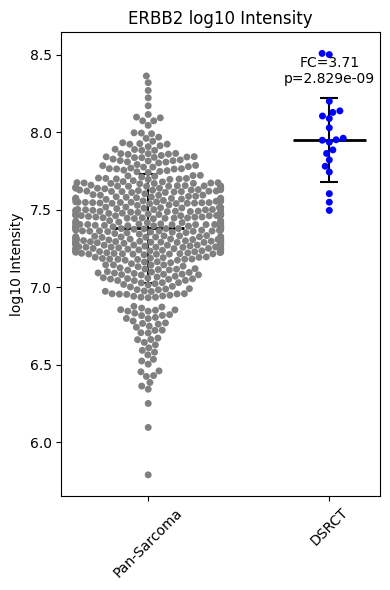

In [5]:
# Create narrower swarm plot

color_dict = {
    'Pan-Sarcoma': 'grey',
    'DSRCT': 'blue'
}
order = ['Pan-Sarcoma', 'DSRCT']

plt.figure(figsize=(4,6))  # narrower width for 2 groups
sns.swarmplot(x='Group', y='log10 Intensity', data=df_long, palette=color_dict)
# Calculate median and SD for each group
# group_stats = df_long.groupby('Group')['log10 Intensity'].agg(['median','std']).reset_index()
group_stats = df_long.groupby('Group')['log10 Intensity'].agg(['median','std']).reindex(order).reset_index()

# Overlay median ± SD properly (SD in both directions)
for i, row in group_stats.iterrows():
    print(i, row)
    median = row['median']
    sd = row['std']
    print(median, sd)
    # Median as a horizontal line
    plt.hlines(y=median, xmin=i-0.2, xmax=i+0.2, color='black', linewidth=2)
    # SD as vertical line going both upward and downward
    plt.vlines(x=i, ymin=median-sd, ymax=median+sd, color='black', linewidth=1.5)
    # Small caps on top and bottom of SD
    plt.hlines(y=median+sd, xmin=i-0.05, xmax=i+0.05, color='black', linewidth=1.5)
    plt.hlines(y=median-sd, xmin=i-0.05, xmax=i+0.05, color='black', linewidth=1.5)



# Fold change relative to PAN SARCOMA (linear scale) using median
pan_median = group_stats[group_stats['Group']=='Pan-Sarcoma']['median'].values[0]
vali_median = group_stats[group_stats['Group']=='DSRCT']['median'].values[0]
fold_change_vali = 10**(vali_median - pan_median)
# Welch's t-test: DSRCT validation vs PAN SARCOMA
pan_values = df['Pan-Sarcoma'].dropna()
vali_values = df['DSRCT'].dropna()
t_vali, p_vali = ttest_ind(vali_values, pan_values, equal_var=False)
# Annotate fold change and p-value on the plot
plt.text(1, vali_median + group_stats[group_stats['Group']=='DSRCT']['std'].values[0] + 0.1,
         f"FC={fold_change_vali:.2f}\np={p_vali:.3e}", ha='center', color='black')
plt.title('ERBB2 log10 Intensity')
plt.ylabel('log10 Intensity')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()

import os
# Save as SVG in the same folder as the Excel file
folder_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/AS/Projects_active/DSRCT/ERBB2/'
svg_path = os.path.join(folder_path, "ERBB2_swarmplot_colored_medianSD_FC_p_explorationandvalidationcohort_combined.svg")
plt.savefig(svg_path)

In [10]:
# undo log10 transformation of whole df
df = np.power(10, df)
df

# calculate fold change between DSRCT and PANSARCOMA
df['fold_change'] = df['DSRCT'] / df['Pan-Sarcoma']
df


,Pan-Sarcoma,DSRCT,fold_change
0,213346937.0,173590344.0,0.813653
1,172360365.0,126939425.0,0.736477
2,131645060.0,122124924.0,0.927683
3,117884480.0,117507089.0,0.996799
4,113556460.0,110418414.0,0.972366
...,...,...,...
447,2200138.0,NaN,NaN
448,2095034.0,NaN,NaN
449,1987303.0,NaN,NaN
450,1711231.0,NaN,NaN


/tmp/ipykernel_18048/1076028178.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


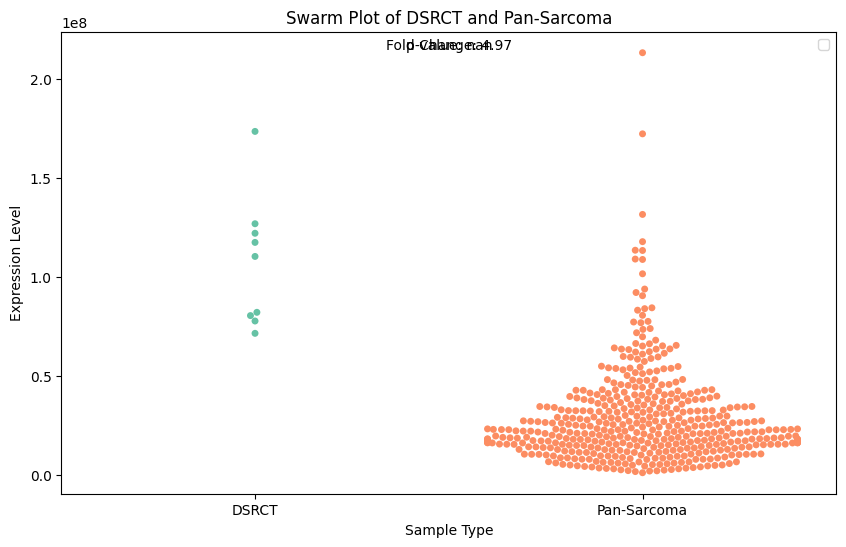

In [ ]:

# calculate fold change of medians
median_dsrct = df['DSRCT'].median()
median_pansarcoma = df['Pan-Sarcoma'].median()
fold_change_median = median_dsrct / median_pansarcoma

# do a statistical test (t-test) between DSRCT and Pan-Sarcoma
from scipy import stats
t_statistic, p_value = stats.ttest_ind(df['DSRCT'], df['Pan-Sarcoma'])

# add p value and fold change to the plot above DSRCT swarmplot

# make swarm plots of 2 columns with median shown (DSRCT and Pan-Sarcoma)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df[['DSRCT', 'Pan-Sarcoma']], palette='Set2')
plt.title('Swarm Plot of DSRCT and Pan-Sarcoma')
plt.ylabel('Expression Level')
plt.xlabel('Sample Type')
plt.legend()


max_y = df[['DSRCT', 'Pan-Sarcoma']].max().max()
# Place text at the top of the plot


# plt.text(0, median_dsrct + 0.1, f'Fold Change: {fold_change_median:.2f}', ha='center', va='bottom')
# plt.text(0, median_dsrct + 0.2, f'p-value: {p_value:.2e}', ha='center', va='bottom')
plt.show()



In [24]:
fold_change_median

4.966429074960292

In [31]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [86]:
# load yoda data and make wide format

results_folder = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2025.08.14_CJ_yoda_manual_normalization'

# fp = pd.read_csv(os.path.join(results_folder, 'preprocessed_fp2_long.csv'), index_col='Gene names')
pp = pd.read_csv(os.path.join(results_folder, 'preprocessed_pp2_long.csv'), index_col=['Gene names', 'Modified sequence'])

# from Run column remove PP in each cell
pp['Run'] = pp['Run'].str.replace('PP', 'Workflow_Test_Batch', regex=False)
pp

Reporter intensity corrected 1  \
Gene names      Modified sequence                                                                    
RRP15           _(Acetyl (Protein N-term))AAAAPDSRVS(Phospho (S...                        0.000000   
                _(Acetyl (Protein N-term))AAAAPDSRVS(Phospho (S...                       -0.012706   
                _(Acetyl (Protein N-term))AAAAPDSRVS(Phospho (S...                        0.045515   
RPP38           _(Acetyl (Protein N-term))AAAPQAPGRGS(Phospho (...                             NaN   
                _(Acetyl (Protein N-term))AAAPQAPGRGS(Phospho (...                             NaN   
...                                                                                            ...   
CTSD            _YYTVFDR_                                                                -0.017239   
                _YYTVFDR_                                                                -0.012964   
EEF1A1P5;EEF1A1 _YYVTIIDAPGHR_                                                            0.000000   
                _YYVTIIDAPGHR_                                                            0.070169   
                _YYVTIIDAPGHR_                                                           -0.007143   

                                                                    Reporter intensity corrected 2  \
Gene names      Modified sequence                                                                    
RRP15           _(Acetyl (Protein N-term))AAAAPDSRVS(Phospho (S...                        0.045227   
                _(Acetyl (Protein N-term))AAAAPDSRVS(Phospho (S...                        0.018148   
                _(Acetyl (Protein N-term))AAAAPDSRVS(Phospho (S...                       -0.031652   
RPP38           _(Acetyl (Protein N-term))AAAPQAPGRGS(Phospho (...                        0.021530   
                _(Acetyl (Protein N-term))AAAPQAPGRGS(Phospho (...                       -0.001849   
...                                                                                            ...   
CTSD            _YYTVFDR_                                                                 0.084496   
                _YYTVFDR_                                                                -0.141479   
EEF1A1P5;EEF1A1 _YYVTIIDAPGHR_                                                            0.011891   
                _YYVTIIDAPGHR_                                                            0.016087   
                _YYVTIIDAPGHR_                                                           -0.065610   

                                                                    Reporter intensity corrected 3  \
Gene names      Modified sequence                                                                    
RRP15           _(Acetyl (Protein N-term))AAAAPDSRVS(Phospho (S...                        0.254097   
                _(Acetyl (Protein N-term))AAAAPDSRVS(Phospho (S...                        0.080936   
                _(Acetyl (Protein N-term))AAAAPDSRVS(Phospho (S...                        0.034621   
RPP38           _(Acetyl (Protein N-term))AAAPQAPGRGS(Phospho (...                             NaN   
                _(Acetyl (Protein N-term))AAAPQAPGRGS(Phospho (...                        0.154133   
...                                                                                            ...   
CTSD            _YYTVFDR_                                                                 0.058622   
                _YYTVFDR_                                                                -0.012815   
EEF1A1P5;EEF1A1 _YYVTIIDAPGHR_                                                            0.003318   
                _YYVTIIDAPGHR_                                                           -0.028257   
                _YYVTIIDAPGHR_                                                            0.052960   

                                                                    Reporter intensity 

In [87]:
data_type = 'pp'

if data_type == 'fp':
    df = fp
elif data_type == 'pp':
    df = pp

# Reset index to make Gene names a column again for pivoting
df_reset = df.reset_index()

# Get the reporter intensity columns (1-11)
reporter_cols = [col for col in df_reset.columns if col.startswith('Reporter intensity corrected')]
print(f"Reporter intensity columns: {reporter_cols}")

# Create a list to store the pivoted dataframes for each reporter intensity column
pivoted_dfs = []

for col in reporter_cols:  
    # Create a pivot table for this reporter intensity column
    if 'Modified sequence' in df_reset.columns:
        pivot_df = df_reset.pivot(index=['Gene names', 'Modified sequence'], columns='Run', values=col)
    else:
        pivot_df = df_reset.pivot(index='Gene names', columns='Run', values=col)

    # Rename columns to include the reporter intensity number
    pivot_df.columns = [f'{col} {col_name}' for col_name in pivot_df.columns]
    
    pivoted_dfs.append(pivot_df)

# Concatenate all pivoted dataframes horizontally
df_wide = pd.concat(pivoted_dfs, axis=1)

print(f"Wide format shape: {df_wide.shape}")
print(f"Column names: {df_wide.columns.tolist()}")
df_wide.head()

Reporter intensity columns: ['Reporter intensity corrected 1', 'Reporter intensity corrected 2', 'Reporter intensity corrected 3', 'Reporter intensity corrected 4', 'Reporter intensity corrected 5', 'Reporter intensity corrected 6', 'Reporter intensity corrected 7', 'Reporter intensity corrected 8', 'Reporter intensity corrected 9', 'Reporter intensity corrected 10', 'Reporter intensity corrected 11']
Wide format shape: (15351, 33)
Column names: ['Reporter intensity corrected 1 Workflow_Test_BatchCL19', 'Reporter intensity corrected 1 Workflow_Test_BatchCL20', 'Reporter intensity corrected 1 Workflow_Test_BatchCL21', 'Reporter intensity corrected 2 Workflow_Test_BatchCL19', 'Reporter intensity corrected 2 Workflow_Test_BatchCL20', 'Reporter intensity corrected 2 Workflow_Test_BatchCL21', 'Reporter intensity corrected 3 Workflow_Test_BatchCL19', 'Reporter intensity corrected 3 Workflow_Test_BatchCL20', 'Reporter intensity corrected 3 Workflow_Test_BatchCL21', 'Reporter intensity correct

Reporter intensity corrected 1 Workflow_Test_BatchCL19  \
Gene names Modified sequence                                                                                            
AAAS       _FS(Phospho (STY))PVLGR_                                                                     0.035504        
AAGAB      _DEIEGLSS(Phospho (STY))DEEH_                                                               -0.082526        
AAK1       _AGQTQPNPGILPIQPALT(Phospho (STY))PR_                                                        0.163723        
           _ILS(Phospho (STY))DVTHSAVFGVPASK_                                                           0.069550        
           _KKS(Phospho (STY))M(Oxidation (M))EELTVIQCTSQE...                                           0.186869        

                                                               Reporter intensity corrected 1 Workflow_Test_BatchCL20  \
Gene names Modified sequence                                                                                            
AAAS       _FS(Phospho (STY))PVLGR_                                                                     0.051241        
AAGAB      _DEIEGLSS(Phospho (STY))DEEH_                                                                0.060517        
AAK1       _AGQTQPNPGILPIQPALT(Phospho (STY))PR_                                                        0.268927        
           _ILS(Phospho (STY))DVTHSAVFGVPASK_                                                           0.172375        
           _KKS(Phospho (STY))M(Oxidation (M))EELTVIQCTSQE...                                           0.554634        

                                                               Reporter intensity corrected 1 Workflow_Test_BatchCL21  \
Gene names Modified sequence                                                                                            
AAAS       _FS(Phospho (STY))PVLGR_                                                                     0.074883        
AAGAB      _DEIEGLSS(Phospho (STY))DEEH_                                                               -0.005951        
AAK1       _AGQTQPNPGILPIQPALT(Phospho (STY))PR_                                                        0.100074        
           _ILS(Phospho (STY))DVTHSAVFGVPASK_                                                           0.027318        
           _KKS(Phospho (STY))M(Oxidation (M))EELTVIQCTSQE...                                           0.356472        

                                                               Reporter intensity corrected 2 Workflow_Test_BatchCL19  \
Gene names Modified sequence                                                                                            
AAAS       _FS(Phospho (STY))PVLGR_                                                                     0.118475        
AAGAB      _DEIEGLSS(Phospho (STY))DEEH_                                                                0.028124        
AAK1       _AGQTQPNPGILPIQPALT(Phospho (STY))PR_                                                        0.135913        
           _ILS(Phospho (STY))DVTHSAVFGVPASK_                                                           0.054627        
           _KKS(Phospho (STY))M(Oxidation (M))EELTVIQCTSQE...                                                NaN        

                                                               Reporter intensity corrected 2 Workflow_Test_BatchCL20  \
Gene names Modified sequence                                                                                            
AAAS       _FS(Phospho (STY))PVLGR_                                                                     0.136910        
AAGAB      _DEIEGLSS(Phospho (STY))DEEH_                                                                0.004961        
AAK1       _AGQTQPNPGILPIQPALT(Phospho (STY))PR_                                                        0.081172        
           _ILS(Phospho (STY))DVTHSAVFGVPASK_                     

In [88]:
# for each column add a Identification metadata column
METADATA_COLUMN_PREFIX = "Identification metadata"

def create_metadata_columns(df: pd.DataFrame) -> pd.DataFrame:
    """create columns to store metadata about the identifications, e.g. imputed, detected in batch, single peptide id
    annotations should be separated by semi-colons, e.g. imputed;single peptide id;detected in batch;
    """
    metadata_cols = as_metadata_columns(get_tmt_channels(df).columns.str)
    df[metadata_cols] = ""
    return df



def as_metadata_columns(x: str):
    return x.replace("Reporter intensity corrected", METADATA_COLUMN_PREFIX)

def get_tmt_channels(df: pd.DataFrame) -> pd.DataFrame:
    return df.filter(regex=r"^Reporter intensity corrected \d{1,2}")

df_wide = create_metadata_columns(df_wide)
df_wide

# add empty Proteins column
df_wide['Proteins'] = ""

In [89]:

df_wide = df_wide.reset_index()
df_wide["Modified sequence"] = df_wide["Modified sequence"].str.replace(
    r"([STY])\(Phospho \(STY\)\)", 
    lambda pat: f"p{pat.group(1)}", 
    regex=True
)
df_wide

,Gene names,Modified sequence,Reporter intensity corrected 1 Workflow_Test_BatchCL19,Reporter intensity corrected 1 Workflow_Test_BatchCL20,Reporter intensity corrected 1 Workflow_Test_BatchCL21,Reporter intensity corrected 2 Workflow_Test_BatchCL19,Reporter intensity corrected 2 Workflow_Test_BatchCL20,Reporter intensity corrected 2 Workflow_Test_BatchCL21,Reporter intensity corrected 3 Workflow_Test_BatchCL19,Reporter intensity corrected 3 Workflow_Test_BatchCL20,...,Identification metadata 9 Workflow_Test_BatchCL19,Identification metadata 9 Workflow_Test_BatchCL20,Identification metadata 9 Workflow_Test_BatchCL21,Identification metadata 10 Workflow_Test_BatchCL19,Identification metadata 10 Workflow_Test_BatchCL20,Identification metadata 10 Workflow_Test_BatchCL21,Identification metadata 11 Workflow_Test_BatchCL19,Identification metadata 11 Workflow_Test_BatchCL20,Identification metadata 11 Workflow_Test_BatchCL21,Proteins
0,AAAS,_FpSPVLGR_,0.035504,0.051241,0.074883,0.118475,0.136910,0.006720,-0.011562,0.037041,...,,,,,,,,,,
1,AAGAB,_DEIEGLSpSDEEH_,-0.082526,0.060517,-0.005951,0.028124,0.004961,0.076788,-0.001481,-0.043762,...,,,,,,,,,,
2,AAK1,_AGQTQPNPGILPIQPALpTPR_,0.163723,0.268927,0.100074,0.135913,0.081172,-0.058045,0.032949,0.058333,...,,,,,,,,,,
3,AAK1,_ILpSDVTHSAVFGVPASK_,0.069550,0.172375,0.027318,0.054627,-0.001545,-0.103744,-0.003774,0.036873,...,,,,,,,,,,
4,AAK1,_KKpSM(Oxidation (M))EELTVIQCTSQELPAQTGLLSQTGD...,0.186869,0.554634,0.356472,NaN,-1.649411,-1.013916,-0.008781,0.282589,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15346,ZZEF1,_pSMEEAR_,0.176859,0.207517,0.048434,0.133053,0.152699,-0.011649,-0.032671,-0.110881,...,,,,,,,,,,
15347,ZZZ3,_NSpSPYR_,0.179326,0.199495,0.008088,0.093398,0.052729,-0.115371,0.000000,-0.142712,...,,,,,,,,,,
15348,ZZZ3,_PKpSPLDPK_,0.129690,0.154607,0.125795,-0.016791,0.102400,-0.113886,-0.019463,-0.087915,...,,,,,,,,,,
15349,ZZZ3,_RQTEPVpSPVLK_,0.058930,0.119154,0.057376,0.059047,0.067142,0.021956,0.146637,0.059074,...,,,,,,,,,,


In [ ]:
# sum across oxidized M?
df_wide['Modified sequence'] = df_wide["Modified sequence"].str.replace("M(Oxidation (M))", "M", regex=False)
print(df_wide.shape)


# 1) Set index
df_wide = df_wide.set_index(['Gene names', 'Modified sequence'])

# 2) Undo log10 (only Reporter columns)
reporter_cols = [c for c in df_wide.columns if c.startswith("Reporter")]
df_wide[reporter_cols] = np.power(10, df_wide[reporter_cols])

# 3) Aggregate (sum) across Modified sequences → collapse to Gene level
df_wide[reporter_cols] = df_wide.groupby(['Gene names', 'Modified sequence'])[reporter_cols].sum()

print(df_wide.shape)


# how come nothing to sum up?

# 4) Redo log10
df_wide[reporter_cols] = np.log10(df_wide[reporter_cols])

(15351, 69)
(15351, 67)


/home/cjensen/.cache/pypoetry/virtualenvs/topas-pipeline-KWgSVD8J-py3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [ ]:
# df_wide
# now we have -inf 

df_wide.to_csv(os.path.join(results_folder, f'preprocessed_{data_type}2_wide.csv'))

Reporter intensity corrected 1 Workflow_Test_BatchCL19  \
Gene names Modified sequence                                                                                 
AAAS       _FpSPVLGR_                                                                        0.035504        
AAGAB      _DEIEGLSpSDEEH_                                                                  -0.082526        
AAK1       _AGQTQPNPGILPIQPALpTPR_                                                           0.163723        
           _ILpSDVTHSAVFGVPASK_                                                              0.069550        
           _KKpSMEELTVIQCTSQELPAQTGLLSQTGDVPLPAGR_                                           0.186869        
...                                                                                               ...        
ZZEF1      _pSMEEAR_                                                                         0.176859        
ZZZ3       _NSpSPYR_                                                                         0.179326        
           _PKpSPLDPK_                                                                       0.129690        
           _RQTEPVpSPVLK_                                                                    0.058930        
ppm1m      _FLPGEPLPAPRPPGPHApSPVPYR_                                                        0.015687        

                                                    Reporter intensity corrected 1 Workflow_Test_BatchCL20  \
Gene names Modified sequence                                                                                 
AAAS       _FpSPVLGR_                                                                        0.051241        
AAGAB      _DEIEGLSpSDEEH_                                                                   0.060517        
AAK1       _AGQTQPNPGILPIQPALpTPR_                                                           0.268927        
           _ILpSDVTHSAVFGVPASK_                                                              0.172375        
           _KKpSMEELTVIQCTSQELPAQTGLLSQTGDVPLPAGR_                                           0.554634        
...                                                                                               ...        
ZZEF1      _pSMEEAR_                                                                         0.207517        
ZZZ3       _NSpSPYR_                                                                         0.199495        
           _PKpSPLDPK_                                                                       0.154607        
           _RQTEPVpSPVLK_                                                                    0.119154        
ppm1m      _FLPGEPLPAPRPPGPHApSPVPYR_                                                        0.048435        

                                                    Reporter intensity corrected 1 Workflow_Test_BatchCL21  \
Gene names Modified sequence                                                                                 
AAAS       _FpSPVLGR_                                                                        0.074883        
AAGAB      _DEIEGLSpSDEEH_                                                                  -0.005951        
AAK1       _AGQTQPNPGILPIQPALpTPR_                                                           0.100074        
           _ILpSDVTHSAVFGVPASK_                                                              0.027318        
           _KKpSMEELTVIQCTSQELPAQTGLLSQTGDVPLPAGR_                                           0.356472        
...                                                                                               ...        
ZZEF1      _pSMEEAR_                                                                         0.048434        
ZZZ3       _NSpSPYR_                                                                         0.008088        
           _PKpSPLDPK_                                                                    